Robust MPC: Simulation with linearized rocket system

In [18]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

###### Dont run this if you want to have some visualization of sets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

In [33]:
from LandMPC.MPCControl_z import MPCControl_z
from src.rocket import Rocket
from src.pos_rocket_vis import *

# Require ipympl
# %matplotlib widget 

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Rocket setup
Ts  = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 15  # simulation length in seconds

#init state
x0 = np.array([0.]*9 + [3., 2., 10.])
x0[5] = np.deg2rad(30)

x_ref = np.array([0.]*9 + [1., 0., 3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
sys = rocket.linearize_sys(xs, us)
A, B = sys.A, sys.B


H = 5
mpc = MPCControl_z(A, B, xs, us, Ts, H)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
iter 10
iter 20
iter 30
iter 40
Minimal robust invariant set computation converged after 47 iterations.
Are the two tightened sets equal? True
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Iteration 10... not yet converged
Iteration 11... not yet converged
Iteration 12... not yet converged
Iteration 13... not yet converged
Iteration 14... not yet converged
Iteration 15... not yet converged
Iteration 16... not yet converged
Iteration 17... not yet converged
Iteration 18... not yet converged
Iteration 19... not yet converged
Iteration 20... not yet converged
Ma

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

print(f"X_poly shape {mpc.X_poly.V.shape}")
print(f"E shape {mpc.E.V.shape}")

fig1, ax1 = plt.subplots(1, 1)
mpc.X_poly.plot(ax1, color='g', opacity=0.5, label=r'$\mathcal{X}$')
mpc.E.plot(ax1, color='r', opacity=0.5, label=r'$\mathcal{E}$')
plt.legend()
plt.show()

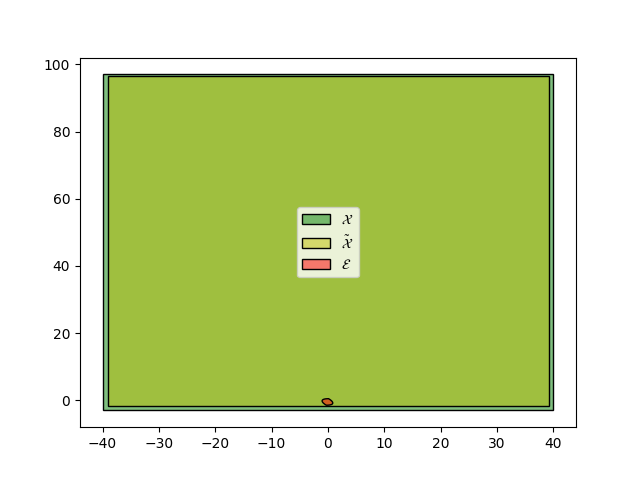

In [34]:
fig2, ax2 = plt.subplots(1, 1)
X_tilde = mpc.X_poly - mpc.E  # Tightened terminal set for state constraints

mpc.X.plot(ax2, color='g', opacity=0.5, label=r'$\mathcal{X}$')
X_tilde.plot(ax2, color='y', opacity=0.5, label=r'$\mathcal{\tilde{X}}$')
mpc.E.plot(ax2, color='r', opacity=0.5, label=r'$\mathcal{E}$')
plt.legend()
plt.show()


Xf_tilde shape (27, 2)


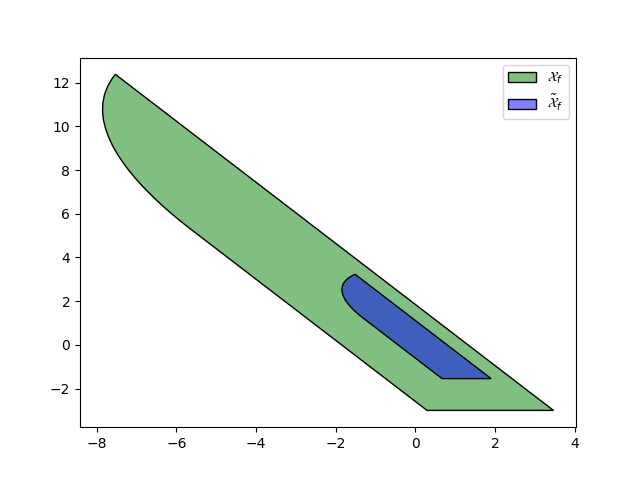

In [35]:
print(f"Xf_tilde shape {mpc.Xf_tilde.V.shape}")


fig3, ax3 = plt.subplots(1, 1)
mpc.Xf.plot(ax3, color='g', opacity=0.5, label=r'$\mathcal{X}_f$')
mpc.Xf_tilde.plot(ax3, color='b', opacity=0.5, label=r'$\tilde{\mathcal{X}}_f$')
plt.legend()
plt.show()


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

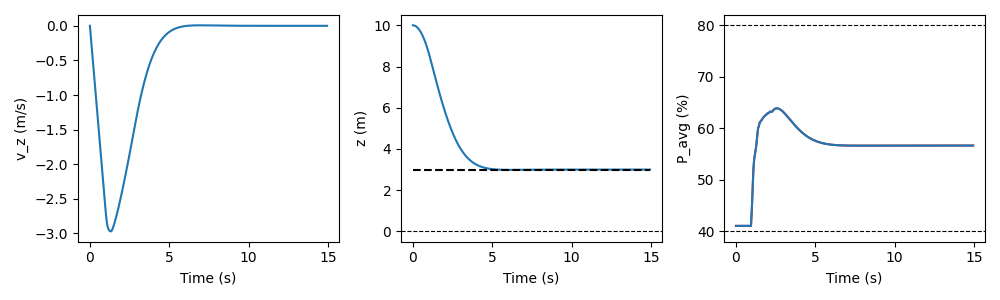

In [36]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='no_noise')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

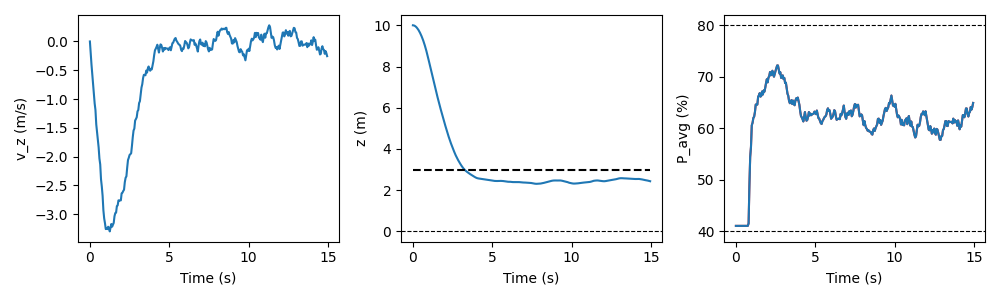

In [37]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

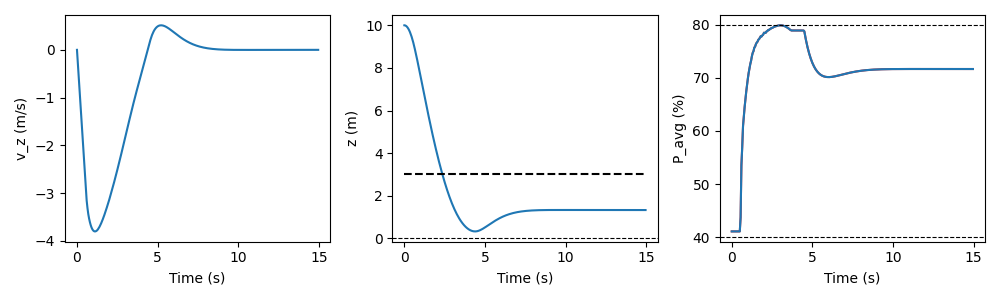

In [38]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')